## Imports

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import os
from datetime import datetime
import spacy

# Loading the data

In [ ]:

# Get the current date
current_date = datetime.now()

# Initialize an empty list to store dataframes
dataframes = []

# Iterate through the dates from the 25th of april to the current date
for day in range(25, 31):
    filename = f"posts_Conservative_hot-2025-04-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        dataframes.append(df)

for day in range(1, current_date.day + 1):
    filename = f"posts_Conservative_hot-2025-05-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        dataframes.append(df)

# Combine all dataframes into one
if dataframes:
    combined_post_Conservative = pd.concat(dataframes, ignore_index=True)
else:
    combined_post_Conservative = pd.DataFrame()  # Empty dataframe if no files are found
    print("No files found")

combined_post_Conservative

,Title,URL,Date,Score,Author,num_comments,identifier
0,Trump to Putin: STOP! Let’s get the Peace Deal...,https://i.redd.it/xgb00fz86swe1.jpeg,2025-04-24T07:58:43,7067,f1sh98,1374,Trump_to_Putin__STOP---20250424_075843
1,"Trump releases ""Trump 2028"" merchandise",https://www.trumpstore.com/,2025-04-24T20:24:38,489,Simp4M0105,256,Trump_releases__Trum---20250424_202438
2,Russia Hits Ukrainian Capital With Worst Bombi...,https://www.dailywire.com/news/russia-hits-ukr...,2025-04-24T13:17:33,1093,TheClintonHitList,156,Russia_Hits_Ukrainia---20250424_131733
3,Trump-appointed judge orders administration to...,https://www.foxnews.com/politics/trump-appoint...,2025-04-24T15:05:40,701,Long_Jelly_9557,45,Trump-appointed_judg---20250424_150540
4,Judge Juan Cano and wife arrested for harborin...,https://x.com/EndWokeness/status/1915542422651...,2025-04-24T18:39:13,305,Kern_system,18,Judge_Juan_Cano_and_---20250424_183913
...,...,...,...,...,...,...,...
1395,Brother of Pope Leo XIV says he was an ‘angel’...,https://www.foxnews.com/video/6372624004112,2025-05-10T08:59:44,6,RightWingNest,0,Brother_of_Pope_Leo_---20250510_085944
1396,"Trump says tax raises are ‘good politics,’ dis...",https://www.foxnews.com/politics/trump-says-ta...,2025-05-09T18:49:00,80,RightWingNest,36,Trump_says_tax_raise---20250509_184900
1397,Jen Psaki's new MSNBC show tanks with key demo...,https://nypost.com/2025/05/10/us-news/jen-psak...,2025-05-10T09:40:19,5,M_i_c_K,0,Jen_Psaki's_new_MSNB---20250510_094019
1398,"Trump Calls For China To Open Its Markets, Flo...",https://www.dailywire.com/news/trump-calls-for...,2025-05-09T11:18:22,293,TheClintonHitList,24,Trump_Calls_For_Chin---20250509_111822


In [ ]:
comments_dataframes = []

for identifier in combined_post_Conservative['identifier']:
    comment_file = os.path.join("post_comments", f"{identifier}.csv")
    if os.path.exists(comment_file):
        comments_df = pd.read_csv(comment_file)
        comments_dataframes.append(comments_df)

if comments_dataframes:
    combined_comments_df = pd.concat(comments_dataframes, ignore_index=True)
else:
    combined_comments_df = pd.DataFrame() 

combined_comments_df

,Comment,Author,Date,Score
0,"""Stop Vlad this isn't you!""",snusboi,2025-04-24T12:04:56,1018
1,We should send JD Vance to shake his hand.,IVcrushonYou,2025-04-24T08:44:31,3188
2,Until someone stops pussyfooting around this w...,EliteJassassin101,2025-04-24T11:21:39,1518
3,"Russia doesn't want peace, it wants Ukraine, a...",cathbadh,2025-04-24T14:59:41,1370
4,He forgot to @ him :(,bearcatjoe,2025-04-24T08:13:20,1897
...,...,...,...,...
20194,[deleted],[deleted],2025-05-09T20:37:40,-8
20195,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6
20196,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13
20197,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2


In [4]:
combined_comments_df["Author"].value_counts()

Author
[deleted]              591
Sure-Wishbone-4293     429
ComputerRedneck        332
kaytin911              224
ITrCool                190
                      ... 
Normal_Saline_           1
AlanSmithee23            1
lion1321                 1
Umngmc                   1
Both-Dimension-3940      1
Name: count, Length: 2109, dtype: int64

In [ ]:
combined_comments_df = combined_comments_df[combined_comments_df["Author"] != "[deleted]"]

combined_comments_df

,Comment,Author,Date,Score
0,"""Stop Vlad this isn't you!""",snusboi,2025-04-24T12:04:56,1018
1,We should send JD Vance to shake his hand.,IVcrushonYou,2025-04-24T08:44:31,3188
2,Until someone stops pussyfooting around this w...,EliteJassassin101,2025-04-24T11:21:39,1518
3,"Russia doesn't want peace, it wants Ukraine, a...",cathbadh,2025-04-24T14:59:41,1370
4,He forgot to @ him :(,bearcatjoe,2025-04-24T08:13:20,1897
...,...,...,...,...
20193,I’m more interested in the astronomical wealth...,virgothesixth,2025-05-09T20:44:13,4
20195,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6
20196,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13
20197,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2


In [6]:
combined_comments_df['Score'] = combined_comments_df['Score'].astype(int)

/tmp/ipykernel_12808/595504052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_df['Score'] = combined_comments_df['Score'].astype(int)


In [7]:
combined_comments_df.nsmallest(10, "Score")

,Comment,Author,Date,Score
491,He can't be ELECTED as president again. But he...,cakebreaker2,2025-04-24T17:15:50,-969
2978,He can't be ELECTED as president again. But he...,cakebreaker2,2025-04-24T17:15:50,-969
493,"Vance / Trump 2028, baby!",slayer_of_idiots,2025-04-24T16:25:12,-740
2980,"Vance / Trump 2028, baby!",slayer_of_idiots,2025-04-24T16:25:12,-740
14831,"Posted about an hour ago, + 294 Karma. The **p...",cliffotn,2025-05-07T11:12:19,-717
17234,"Posted about an hour ago, + 294 Karma. The **p...",cliffotn,2025-05-07T11:12:19,-717
14829,I’m going to type the same thing to you guys. ...,cliffotn,2025-05-07T11:59:04,-710
17232,I’m going to type the same thing to you guys. ...,cliffotn,2025-05-07T11:59:04,-710
489,"Yeah, if he tries to do it. Shitposting hat is...",jonnio2215,2025-04-24T15:41:24,-648
2976,"Yeah, if he tries to do it. Shitposting hat is...",jonnio2215,2025-04-24T15:41:24,-648


Clearly some comments on the subreddit are not particularly representative of the views held... That said they're probably a decently small proportion, and it's possible the language used in these comments is still different here than elsewhere, so we leave them in. Any pruning of these comments would be fairly arbitrary anyways. 

In [ ]:
democrats_dataframes = []

for day in range(25, 31):
    filename = f"posts_democrats_hot-2025-04-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        democrats_dataframes.append(df)

for day in range(1, current_date.day + 1):
    filename = f"posts_democrats_hot-2025-05-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        democrats_dataframes.append(df)


if democrats_dataframes:
    combined_post_Democrats = pd.concat(democrats_dataframes, ignore_index=True)
else:
    combined_post_Democrats = pd.DataFrame() 

combined_post_Democrats

,Title,URL,Date,Score,Author,num_comments,identifier
0,Doxing & calls for violence are strickly forbi...,https://www.reddit.com/r/democrats/comments/1i...,2025-02-04T19:50:34,122,backpackwayne,0,Doxing_&_calls_for_v---20250204_195034
1,Trump announces his unconstitutional 2028 run ...,https://i.redd.it/8okn2fydjtwe1.jpeg,2025-04-24T12:34:08,7591,International-Drag23,536,Trump_announces_his_---20250424_123408
2,Double checked this is real 🙃,https://i.redd.it/ncu0pse2wswe1.jpeg,2025-04-24T10:23:25,3852,Unlikely-Cut2696,569,Double_checked_this_---20250424_102325
3,"It’s true. Whenever I see any red hat, I shutt...",https://i.redd.it/hy6mrq5yivwe1.jpeg,2025-04-24T19:15:14,697,uselessZZwaste,7,It’s_true._Whenever_---20250424_191514
4,Can I just say … I’m loving Rachel Maddow toni...,https://i.redd.it/dq665o0dqwwe1.jpeg,2025-04-24T23:18:34,210,Unhappy_Cress5111,12,Can_I_just_say_…_I’m---20250424_231834
...,...,...,...,...,...,...,...
1395,Bless their heart,https://i.redd.it/6yz0n0d21fze1.jpeg,2025-05-07T14:58:54,123,MaximusDM22,2,Bless_their_heart---20250507_145854
1396,WATCH: Rep. Pressley pushes Bessent to get rid...,https://www.youtube.com/watch?v=Ih6iZf07IQM,2025-05-07T15:01:51,92,shallah,7,WATCH__Rep._Pressley---20250507_150151
1397,Grifters thrive under Trump’s scam-friendly ad...,https://www.theverge.com/policy/662109/trump-w...,2025-05-07T13:16:01,111,Peteostro,6,Grifters_thrive_unde---20250507_131601
1398,Joe Biden slams Trump for 'foolish' appeasemen...,https://www.nbcnews.com/politics/joe-biden/joe...,2025-05-07T07:05:24,340,progress18,7,Joe_Biden_slams_Trum---20250507_070524


In [ ]:
democrats_comments_dataframes = []

for identifier in combined_post_Democrats['identifier']:
    comment_file = os.path.join("post_comments", f"{identifier}.csv")
    if os.path.exists(comment_file):
        comments_df = pd.read_csv(comment_file)
        democrats_comments_dataframes.append(comments_df)

if democrats_comments_dataframes:
    combined_comments_Democrats = pd.concat(democrats_comments_dataframes, ignore_index=True)
else:
    combined_comments_Democrats = pd.DataFrame()
combined_comments_Democrats

,Comment,Author,Date,Score
0,https://preview.redd.it/gzhum80jmtwe1.jpeg?wid...,PretendMud8714,2025-04-24T12:51:47,251
1,He should have been thrown in a cell ten minut...,Voltage_Z,2025-04-24T12:37:22,2039
2,Hopefully the lord will take him before that.,SadPhase2589,2025-04-24T12:54:02,415
3,Commenting and upvoting for attention. MAGA bo...,ExplicitDrift,2025-04-24T12:54:00,278
4,Where I can get an Obama 2028 hat?,bundesrepu,2025-04-24T12:49:05,346
...,...,...,...,...
53708,Please approve of a private company's spy sate...,Same_Net2953,2025-05-07T17:42:31,1
53709,It's a beautiful thing up there in the sky it ...,SteelPumpkin75,2025-05-07T17:42:49,1
53710,How tf is this even legal,Formal-Hawk9274,2025-05-07T19:35:32,1
53711,No he means the ones that are blocking out the...,WestsideBuppie,2025-05-07T21:25:38,2


In [10]:
combined_comments_Democrats["Author"].value_counts()

Author
[deleted]             821
Rosebunse             307
LivingIndependence    303
Lebarican22           273
ms_directed           250
                     ... 
infolink324             1
Ok_Awareness5517        1
cornham                 1
taisynn                 1
BlaqJaq                 1
Name: count, Length: 7726, dtype: int64

Many deleted comments again.

In [11]:
combined_comments_Democrats = combined_comments_Democrats[combined_comments_Democrats["Author"] != "[deleted]"]

In [12]:
combined_comments_Democrats['Score'] = combined_comments_Democrats['Score'].astype(int)
combined_comments_Democrats.nsmallest(10, "Score")

/tmp/ipykernel_12808/230943820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_Democrats['Score'] = combined_comments_Democrats['Score'].astype(int)


,Comment,Author,Date,Score
40324,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
43829,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
47338,This clip is nonsense. She just kept cutting h...,KillerDad0987,2025-05-04T21:42:55,-42
42738,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
46247,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
50426,"Yeah, it's called the lawsuit. Reading article...",undercurrents,2025-05-06T22:59:16,-40
10438,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
15998,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
23173,"In all fairness, they deported the parents. Wh...",ryguy32789,2025-04-26T15:58:00,-39
11051,Comedy news ruined America,Thumbkeeper,2025-04-26T13:11:59,-38


Strangely, despite having many more comments, our sample from r/Democrats does not include nearly the same type of extremely downvoted comment as the ones from r/Conservative. Unusual for sure, but again we will just observe the difference, not arbitrarily prune highly disliked comments.

### Correcting class imbalance

We have far more comments from r/democrats than from r/Conservative, so to correct the class imbalance we will simply take a random sample from the democrat comments.

In [ ]:
sampled_democrat_comments = combined_comments_Democrats.sample(n=len(combined_comments_df), random_state=69420) #comical random state, I know

sampled_democrat_comments['Subreddit'] = 'Democrats'
combined_comments_df['Subreddit'] = 'Conservative'

combined_comments = pd.concat([sampled_democrat_comments, combined_comments_df], ignore_index=True)

combined_comments

/tmp/ipykernel_12808/3466954145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_comments_df['Subreddit'] = 'Conservative'


,Comment,Author,Date,Score,Subreddit
0,Strong suspicion is most “supporters” are bots...,freedinthe90s,2025-05-06T08:30:45,2,Democrats
1,That's not deportation. That's human trafficking.,Careful-Committee-96,2025-05-03T19:42:14,2,Democrats
2,Anything to distract from the incoming recession,lovely_orchid_,2025-05-04T20:19:15,6,Democrats
3,And so many people said not to take it seriously,kerryfinchelhillary,2025-05-07T11:08:47,8,Democrats
4,The only answer to that question that I can th...,Big_Salt371,2025-05-09T14:28:04,1,Democrats
...,...,...,...,...,...
39211,I’m more interested in the astronomical wealth...,virgothesixth,2025-05-09T20:44:13,4,Conservative
39212,The church is in a tough spot. They have alway...,chances906,2025-05-09T21:11:53,6,Conservative
39213,Officially? I don't know. The church has been ...,chances906,2025-05-09T20:50:27,13,Conservative
39214,I was just saying if we're going to ask the po...,Uller85,2025-05-10T05:57:10,2,Conservative


In [ ]:
def clean(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

language_model = spacy.load("en_core_web_sm")

#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

# Lemmmatizing thousands of comments miiiiight take a little bit...
combined_comments["cleaned_comment"] = combined_comments["Comment"].apply(clean)
combined_comments["lemmatized_comment"] = combined_comments["cleaned_comment"].apply(lemmatize)

In [15]:
from sklearn.model_selection import train_test_split
X = combined_comments["cleaned_comment"]
y = combined_comments["Subreddit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23401924)

y_train.value_counts()

Subreddit
Conservative    15814
Democrats       15558
Name: count, dtype: int64

Random sample at this size is roughly class-balanced.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer

pipeline = Pipeline(steps=[
    ("bag_of_words", CountVectorizer()),
    ("term_frequency_idf", TfidfTransformer()),
    ("model", MultinomialNB())
])

param_grid = {"bag_of_words__max_features": [1000, 5000, 10000, 20000, 30000], "term_frequency_idf__norm":["l1", "l2"],
              "model__alpha": [0.01, 0.1, 1, 5, 10, 100]}

model = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_log_loss", n_jobs=-1)
model.fit(X_train, y_train)

model = CalibratedClassifierCV(model.best_estimator_, method="sigmoid", cv=5)
model.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('bag_of_words',
                                                  CountVectorizer(max_features=30000)),
                                                 ('term_frequency_idf',
                                                  TfidfTransformer()),
                                                 ('model',
                                                  MultinomialNB(alpha=0.1))]))

In [18]:
from sklearn.metrics import accuracy_score, log_loss, brier_score_loss, classification_report

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba[:, 1], pos_label='Democrats')

print(f"{'Metric':<20}{'Value':<10}")
print("-" * 30)
print(f"{'Accuracy':<20}{accuracy:<10.4f}")
print(f"{'Log Loss':<20}{logloss:<10.4f}")
print(f"{'Brier Score':<20}{brier_score:<10.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=model.classes_))

Metric              Value     
------------------------------
Accuracy            0.7852    
Log Loss            0.4481    
Brier Score         0.1458    

Classification Report:
              precision    recall  f1-score   support

Conservative       0.78      0.78      0.78      3794
   Democrats       0.79      0.79      0.79      4050

    accuracy                           0.79      7844
   macro avg       0.78      0.78      0.78      7844
weighted avg       0.79      0.79      0.79      7844



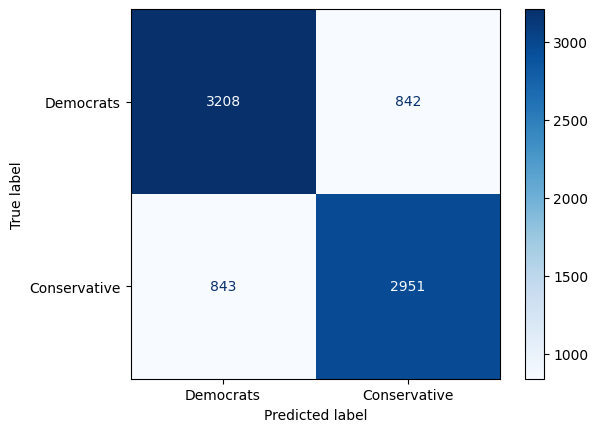

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['Democrats', 'Conservative'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Democrats', 'Conservative'])
disp.plot(cmap='Blues')

Errors are quite balanced. Type 1 and type 2 errors are essentially equally common. 

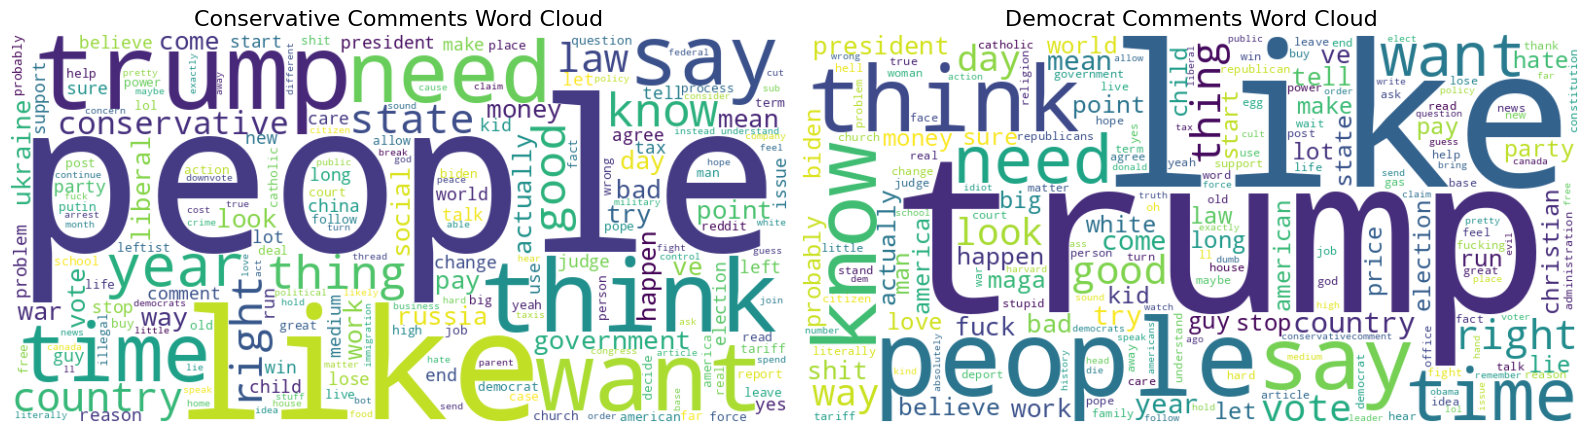

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

conservative_comments = combined_comments[combined_comments['Subreddit'] == 'Conservative']['lemmatized_comment']
democrat_comments = combined_comments[combined_comments['Subreddit'] == 'Democrats']['lemmatized_comment']

vectorizer_conservative = CountVectorizer(max_features=1000, stop_words='english')
vectorizer_democrat = CountVectorizer(max_features=1000, stop_words='english')

conservative_bow = vectorizer_conservative.fit_transform(conservative_comments)
democrat_bow = vectorizer_democrat.fit_transform(democrat_comments)

conservative_word_freq = dict(zip(vectorizer_conservative.get_feature_names_out(), conservative_bow.toarray().sum(axis=0)))
democrat_word_freq = dict(zip(vectorizer_democrat.get_feature_names_out(), democrat_bow.toarray().sum(axis=0)))

conservative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conservative_word_freq)
democrat_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(democrat_word_freq)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(conservative_wordcloud, interpolation='bilinear')
plt.title('Conservative Comments Word Cloud', fontsize=16)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(democrat_wordcloud, interpolation='bilinear')
plt.title('Democrat Comments Word Cloud', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
conservativewords = ["trump", "gop", "conservative", "right", "red", "maga", "rnc", "right-wing", "republican", "republicans"]
democratwords = ["biden", "harris", "obama","democrat", "democrats", "dnc", "liberal", "leftist", "left", "blue"]

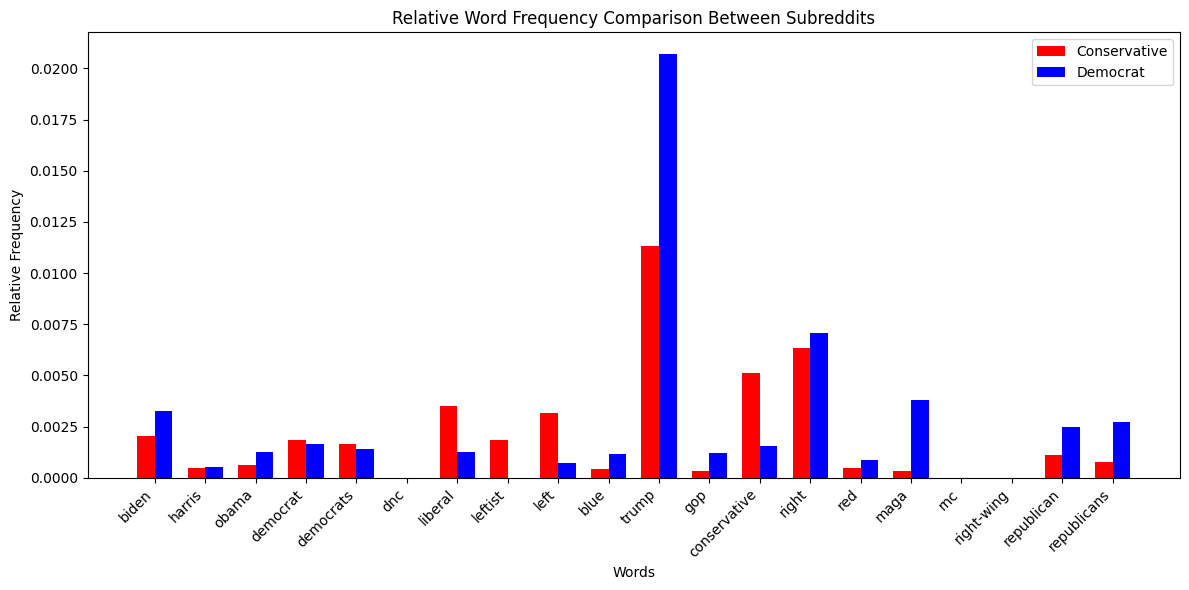

In [ ]:
import numpy as np
all_words = democratwords+conservativewords

x = np.arange(len(all_words)) 
width = 0.35

total_conservative_words = sum(conservative_word_freq.values())
total_democrat_words = sum(democrat_word_freq.values())

relative_conservative_frequencies = [conservative_word_freq.get(word, 0) / total_conservative_words for word in all_words]
relative_democrat_frequencies = [democrat_word_freq.get(word, 0) / total_democrat_words for word in all_words]
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, relative_conservative_frequencies, width, label='Conservative', color='red')
bars2 = ax.bar(x + width/2, relative_democrat_frequencies, width, label='Democrat', color='blue')

ax.set_xlabel('Words')
ax.set_ylabel('Relative Frequency')
ax.set_title('Relative Word Frequency Comparison Between Subreddits')
ax.set_xticks(x)
ax.set_xticklabels(all_words, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


the model we are about to use is a bit larger than the one we covered in class, in order to extend the context window. A GPU might be necessary to do all of the sentiment analysis efficiently. 

In [23]:
import torch
print(torch.cuda.is_available())
print(torch.version.hip) 

True
6.1.40093-bd86f1708


This code is a little different from the way we did sentiment analysis in class, because it utilizes batch processing to take advantage of parallelism. This helps with our less lightweight model.

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

sentiment_pipeline = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

texts = combined_comments["cleaned_comment"].str[:512].tolist()

results = sentiment_pipeline(texts, batch_size=128)

sentiments = [r["label"] for r in results]

combined_comments["sentiment"] = sentiments

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Device set to use cuda:0


In [25]:
combined_comments["sentiment"].value_counts()

sentiment
LABEL_0    20871
LABEL_1    15240
LABEL_2     3105
Name: count, dtype: int64

In [ ]:
# We have to fix the sentiment labels since they don't come out nicely with this model
combined_comments["sentiment"] = combined_comments["sentiment"].replace({
    "LABEL_0": "NEG",
    "LABEL_1": "NEU",
    "LABEL_2": "POS"
})

combined_comments["sentiment"].value_counts()

sentiment
NEG    20871
NEU    15240
POS     3105
Name: count, dtype: int64

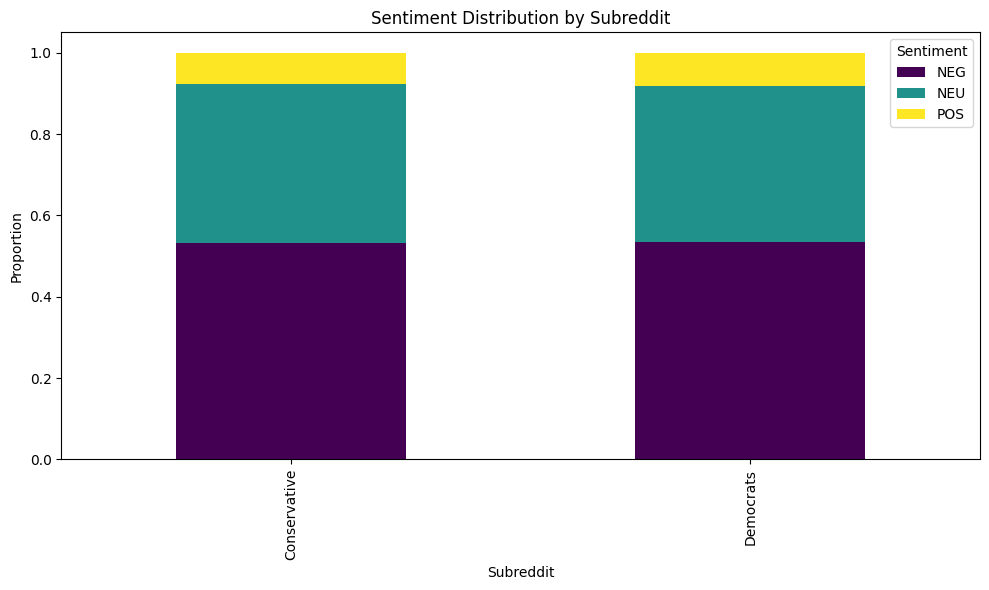

In [ ]:
import matplotlib.pyplot as plt


sentiment_distribution = combined_comments.groupby("Subreddit")["sentiment"].value_counts(normalize=True).unstack()

sentiment_distribution.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')

plt.title("Sentiment Distribution by Subreddit")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

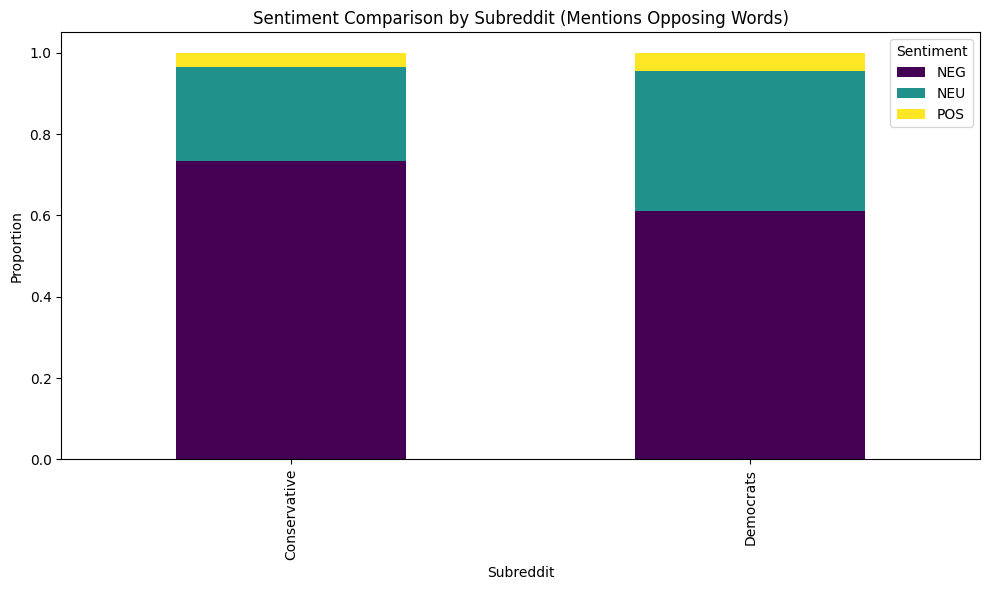

In [ ]:
import matplotlib.pyplot as plt

democrat_mentions_conservativewords = combined_comments[
    (combined_comments['Subreddit'] == 'Democrats') &
    (combined_comments['lemmatized_comment'].str.contains('|'.join(conservativewords), case=False))
]

conservative_mentions_democratwords = combined_comments[
    (combined_comments['Subreddit'] == 'Conservative') &
    (combined_comments['lemmatized_comment'].str.contains('|'.join(democratwords), case=False))
]

democrat_sentiment_counts = democrat_mentions_conservativewords['sentiment'].value_counts(normalize=True)
conservative_sentiment_counts = conservative_mentions_democratwords['sentiment'].value_counts(normalize=True)


sentiment_comparison = pd.DataFrame({
    'Conservative': conservative_sentiment_counts,
    'Democrats': democrat_sentiment_counts
}).T

sentiment_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Sentiment Comparison by Subreddit (Mentions Opposing Words)")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [30]:
#loading r/politics posts and comments
politics_dataframes = []

for day in range(25, 31):
    filename = f"posts_politics_hot-2025-04-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        politics_dataframes.append(df)

for day in range(1, current_date.day + 1):
    filename = f"posts_politics_hot-2025-05-{day:02d}.csv"
    filepath = os.path.join("post_csvs", filename)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        politics_dataframes.append(df)


# Combine all dataframes into one
if politics_dataframes:
    combined_post_politics = pd.concat(politics_dataframes, ignore_index=True)
else:
    combined_post_politics = pd.DataFrame()

combined_post_politics

,Title,URL,Date,Score,Author,num_comments,identifier
0,"China cancels 12,000 metric tons of US pork sh...",https://thehill.com/policy/international/52663...,2025-04-24T18:43:16,10101,kootles10,1307,"China_cancels_12,000---20250424_184316"
1,Fox News Forced to Admit That Everyone Hates T...,https://newrepublic.com/post/194341/donald-tru...,2025-04-24T16:00:42,16556,thenewrepublic,548,Fox_News_Forced_to_A---20250424_160042
2,Trump Unveiling 2028 Campaign Hats Sends Users...,https://www.latintimes.com/trump-unveiling-202...,2025-04-24T14:31:52,9834,PostHeraldTimes,574,Trump_Unveiling_2028---20250424_143152
3,Pete Hegseth’s Signalgate Scandal Somehow Just...,https://newrepublic.com/post/194337/pete-hegse...,2025-04-24T11:51:05,22962,harsh2k5,509,Pete_Hegseth’s_Signa---20250424_115105
4,"""I’ll hook you to a f**king polygraph!"": Hegse...",https://www.salon.com/2025/04/24/ill-hook-you-...,2025-04-24T19:06:27,3162,yam12,158,_I’ll_hook_you_to_a_---20250424_190627
...,...,...,...,...,...,...,...
1395,"Kelly, Mullin, Crapo, Cramer Introduce Bill to...",https://www.kelly.senate.gov/newsroom/press-re...,2025-05-10T09:21:15,60,progress18,6,"Kelly,_Mullin,_Crapo---20250510_092115"
1396,H.R.3319 - To amend the McKinney-Vento Homeles...,https://www.congress.gov/bill/119th-congress/h...,2025-05-10T14:56:20,21,FervidBug42,11,H.R.3319_-_To_amend_---20250510_145620
1397,What if the President Tries to Annex Greenland...,https://reason.com/2025/05/04/what-if-the-pres...,2025-05-10T08:51:23,65,SpaceElevatorMusic,20,What_if_the_Presiden---20250510_085123
1398,White House’s Stephen Miller: ‘We are actively...,https://www.msnbc.com/rachel-maddow-show/maddo...,2025-05-10T03:36:33,156,amartin141,49,White_House’s_Stephe---20250510_033633


In [31]:
politics_comments_dataframes = []

for identifier in combined_post_politics['identifier']:
    comment_file = os.path.join("post_comments", f"{identifier}.csv")
    if os.path.exists(comment_file):
        comments_df = pd.read_csv(comment_file)
        politics_comments_dataframes.append(comments_df)

if politics_comments_dataframes:
    combined_comments_politics = pd.concat(politics_comments_dataframes, ignore_index=True)
else:
    combined_comments_politics = pd.DataFrame()
combined_comments_politics

,Comment,Author,Date,Score
0,"As a reminder, this subreddit [is for civil d...",AutoModerator,2025-04-24T18:43:16,1
1,"From the article: China canceled 12,000 metri...",kootles10,2025-04-24T18:43:35,2244
2,There is a story today that the Trump circle w...,unaskthequestion,2025-04-24T20:13:20,1331
3,Republicans you guys done fucked up bad.,ShoppingDismal3864,2025-04-24T18:44:02,10351
4,You can guarantee every low level Chinese bure...,leighanthony12345,2025-04-24T18:50:12,1208
...,...,...,...,...
362414,I mean I did list both I don't assume I'm in ...,Rich_Ad1877,2025-05-09T11:55:44,-4
362415,Yeah fair and Trump is a horrid pedophile and ...,Rich_Ad1877,2025-05-09T11:58:53,-2
362416,They mean the interview where Trump said he'd ...,Froyn,2025-05-09T11:09:52,18
362417,My criticisms of Trump aren’t an endorsement o...,exomniac,2025-05-09T12:30:26,3


In [ ]:
# Remove deleted comments, translate score as int
combined_comments_politics['Score'] = combined_comments_politics['Score'].astype(int)
combined_comments_politics["Comment"] = combined_comments_politics["Comment"].astype(str)
combined_comments_politics = combined_comments_politics[combined_comments_politics["Author"] != "[deleted]"]
combined_comments_politics.nsmallest(10, "Score")

,Comment,Author,Date,Score
18277,you're disgusted with the only person trying t...,pan_tera,2025-04-24T13:51:35,-239
176726,Well they did give him a lot more than an inch...,anticixx2,2025-05-02T12:42:47,-233
207604,Well they did give him a lot more than an inch...,anticixx2,2025-05-02T12:42:47,-233
167400,If your depiction of mental illness reads like...,Geordi_Laforge_86,2025-05-02T10:43:45,-232
208219,If your depiction of mental illness reads like...,Geordi_Laforge_86,2025-05-02T10:43:45,-232
294909,"Powell is making the Fed political, and using ...",box-cable,2025-05-07T15:45:00,-220
33667,And Joe pardoned a huge swath of people who ha...,BlindSausage13,2025-04-25T16:23:04,-168
80444,And Joe pardoned a huge swath of people who ha...,BlindSausage13,2025-04-25T16:23:04,-168
285095,We don't actually love him. Lots of us can't s...,LongConcentrate9442,2025-05-06T18:04:51,-163
318766,"As a cat person, I actually don’t mind her as ...",Unoriginal-,2025-05-09T07:00:20,-155


In [ ]:
combined_comments_politics["cleaned_comment"] = combined_comments_politics["Comment"].apply(clean)
combined_comments_politics["lemmatized_comment"] = combined_comments_politics["cleaned_comment"].apply(lemmatize)

In [ ]:
texts = combined_comments_politics["cleaned_comment"].str[:512].tolist()
results = sentiment_pipeline(texts, batch_size=128)
sentiments = [r["label"] for r in results]
combined_comments_politics["sentiment"] = sentiments

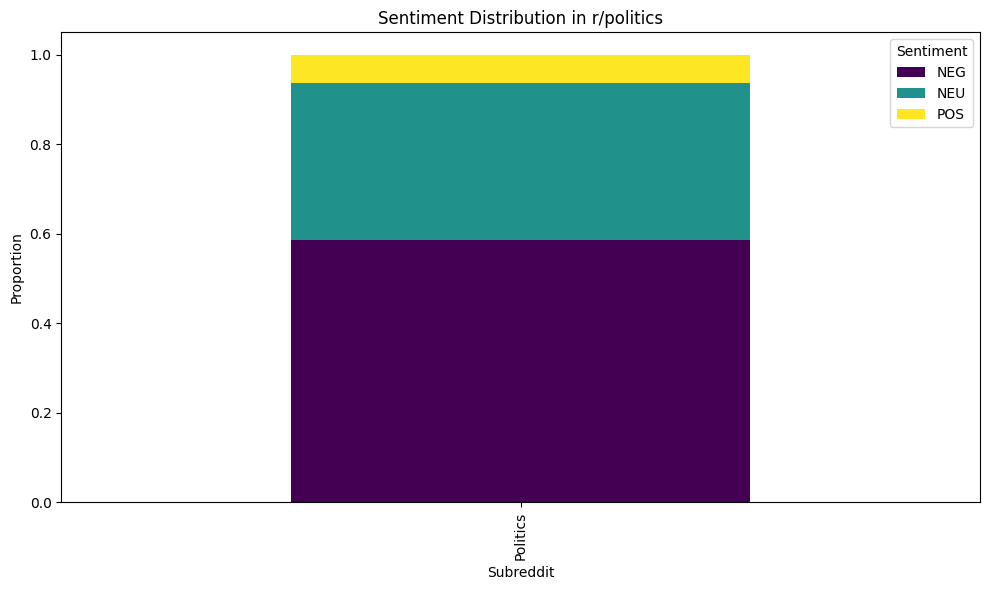

In [ ]:
combined_comments_politics["sentiment"] = combined_comments_politics["sentiment"].replace({
    "LABEL_0": "NEG",
    "LABEL_1": "NEU",
    "LABEL_2": "POS"
})

combined_comments_politics["Subreddit"] = "Politics"
sentiment_distribution = combined_comments_politics.groupby("Subreddit")["sentiment"].value_counts(normalize=True).unstack()
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Sentiment Distribution in r/politics")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

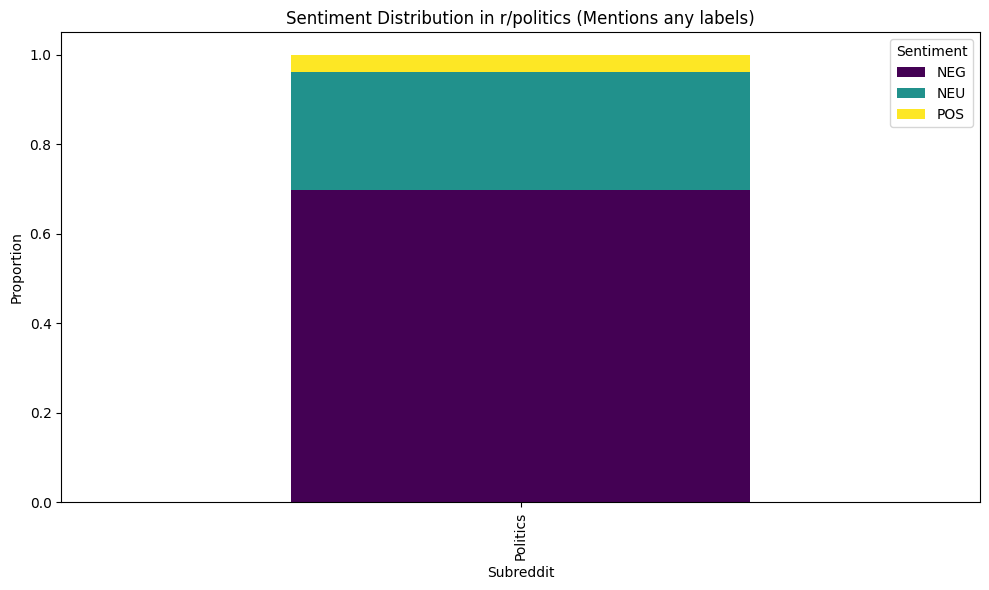

In [ ]:
politics_mentions_labels = combined_comments_politics[
    (combined_comments_politics['lemmatized_comment'].str.contains('|'.join(all_words), case=False))
]
sentiment_distribution_2 = politics_mentions_labels.groupby("Subreddit")["sentiment"].value_counts(normalize=True).unstack()
sentiment_distribution_2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Sentiment Distribution in r/politics (Mentions any labels)")
plt.ylabel("Proportion")
plt.xlabel("Subreddit")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



Again, when labels are involved, the sentiment distribution is considerably more negative.